# Differences between Data Scientists and Software Developers in Stack Overflow Survey Data from 2017 to 2020
Project "Write a Data Science Blog Post" for [Udacity Data Scientist Nanodegree](https://www.udacity.com/course/data-scientist-nanodegree--nd025) 

by Jens Martin  
outofthecold@web.de

<a id='contents'></a>
## Table of Contents  
**1. <a href='#introduction'>Introduction</a>**  

**2. <a href='#data_understanding'>Data Understanding and Selection</a>**  
a. <a href='#assessing_data'>Assessing 2020 Survey Data</a>  
b. <a href='#feature_selection'>Choosing Relevant Features</a>  
c. <a href='#integrating_2017_2019'>Integrating Survey Data from 2017-2019</a>  

**3. <a href='#data_preparation'>Data Preparation</a>**  
a. <a href='#missing_data'>Handling Missing Data</a>  
b. <a href='#clean_devtype'>Wrangling *DevType* Data</a>  
c. <a href='#clean_edlevel'>Wrangling *EdLevel* Data</a>  
d. <a href='#clean_undergradmajor'>Wrangling *UndergradMajor* Data</a>  
e. <a href='#clean_convertedcomp'>Wrangling *ConvertedComp* Data</a>  
f. <a href='#clean_jobsat'>Wrangling *JobSat* Data</a>  
g. <a href='#clean_gender'>Wrangling *Gender* Data</a>  

**4. <a href='#data_analysis'>Data Analysis and Visualization</a>**  
a. <a href='#proportion'>Proportion of Data Scientists</a>  
b. <a href='#gender'>Gender</a>  
c. <a href='#education'>Education</a>  
d. <a href='#income'>Income</a>  
e. <a href='#jobsat'>Job Satisfaction</a> 

<a id='introduction'></a>
# 1. Introduction
The goal of this notebook is to analyse stack overflow survey data for writing a blog post on the differences between data scientists and "traditional" software developers with regard to aspects like education level, gender, income, and job satisfaction.

In addition to analysing the most recent survey data from 2020 I will also integrate some data from the previous years to discern trends over years.

The main questions I'd like to investigate are:

**1. Proportion of Data Scientists**  
How large is the proportion of data scientists among all respondents?  
Has this proportion changed significantly from 2017 to 2020?

**2. Gender**  
Does the gender distribution differ between data scientists and other developer types?

**3. Education**  
Do data scientists have a different education level than other developer?  
How does their primary field of study differ?

**4. Income**  
How does the income differ between data scientists and other developer types?  

**5. Job Satisfaction**  
Does job satisfaction differ between data scientists and other developer types?

<a href='#contents'>(Table of Contents)</a>

<a id='data_understanding'></a>
# 2. Data Understanding and Selection

<a id='assessing_data'></a>
## a) Assessing 2020 Survey Data

The Stack Overflow Annual Developer Survey data as well as the original questionaires for the ten recent years are publicly available from this [source](https://insights.stackoverflow.com/survey/). To get an overview, I will first concentrate on the survey data from 2020.

The main data for each year consists of two csv files. The first one contains the survey results schema with the formulation of the questions for each column in the main data set:

In [31]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)
sns.set_theme()

%matplotlib inline

In [2]:
# Load results schema for 2020 survey data
schema20 = pd.read_csv('./developer_survey_2020/survey_results_schema.csv', index_col='Column')
schema20

,QuestionText
Column,
Respondent,Randomized respondent ID number (not in order ...
MainBranch,Which of the following options best describes ...
Hobbyist,Do you code as a hobby?
Age,What is your age (in years)? If you prefer not...
Age1stCode,At what age did you write your first line of c...
CompFreq,"Is that compensation weekly, monthly, or yearly?"
CompTotal,What is your current total compensation (salar...
ConvertedComp,Salary converted to annual USD salaries using ...
Country,Where do you live?


The second csv file contains the actual survey raw data:

In [3]:
# Load raw data for 2020 survey
raw20 = pd.read_csv('./developer_survey_2020/survey_results_public.csv', index_col='Respondent')
raw20.head()

,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
Respondent,,,,,,,,,,,,,,,,,,,,,
1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [4]:
# Get a first overview
raw20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64461 entries, 1 to 65112
Data columns (total 60 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   MainBranch                    64162 non-null  object 
 1   Hobbyist                      64416 non-null  object 
 2   Age                           45446 non-null  float64
 3   Age1stCode                    57900 non-null  object 
 4   CompFreq                      40069 non-null  object 
 5   CompTotal                     34826 non-null  float64
 6   ConvertedComp                 34756 non-null  float64
 7   Country                       64072 non-null  object 
 8   CurrencyDesc                  45472 non-null  object 
 9   CurrencySymbol                45472 non-null  object 
 10  DatabaseDesireNextYear        44070 non-null  object 
 11  DatabaseWorkedWith            49537 non-null  object 
 12  DevType                       49370 non-null  object 
 13  E

### First Conclusions on 2020 Survey Data
- With 64,461 rows and 60 columns the data set is quite comprehensive and contains a large number of columns that are arbitrary for this project. 
- Only four out of 60 columns are encoded as numerical data types (*float64*), while many columns with essentially numerical values (e.g. *Age1stCode* or *YearsCode*) are encodes as data type *object*.  
- There are NaN values in almost all columns. In some columns, like *CompTotal* or *ConvertedComp*, almost half of the rows contain missing values.
- Some columns are labeled as *NEW*, like *NEWDevOps* and *NEWJobHunt* and will most probably not be included in the previous years' surveys.

**Next steps:**
1. Decide which columns are essential for the project and then create a new, more manageable dataframe that contains only these columns.
2. Find out if these data are also available for the years 2017 to 2019 and merge the data.  
3. Take a closer look at these columns and decide which data wrangling steps are necessary.

<a id='feature_selection'></a>
## b) Choosing Relevant Features

As the aim of the blog post is to compare data scientists to other developer types, the most important information is the developer type of the respondent, which is encode in the column ***DevType***.

In [5]:
# Schema for 'DevType' column
schema20.loc['DevType'][0]

'Which of the following describe you? Please select all that apply.'

In [6]:
# Possible answers for 'DevType'
raw20.DevType.str.split(';').explode().unique()

array(['Developer, desktop or enterprise applications',
       'Developer, full-stack', 'Developer, mobile', nan, 'Designer',
       'Developer, front-end', 'Developer, back-end',
       'Developer, QA or test', 'DevOps specialist',
       'Developer, game or graphics', 'Database administrator',
       'Developer, embedded applications or devices', 'Engineer, data',
       'Educator', 'System administrator', 'Engineering manager',
       'Product manager', 'Data or business analyst',
       'Academic researcher',
       'Data scientist or machine learning specialist', 'Scientist',
       'Senior executive/VP', 'Engineer, site reliability',
       'Marketing or sales professional'], dtype=object)

The first point of investigation will be the respondents' **education**. In this field, I will investigate two aspects, the *highest level of formal education*, encoded in ***EdLevel***, and the *primary field of study*, encoded in ***UndergradMajor***.  

In [7]:
# Schema for 'EdLevel' column
schema20.loc['EdLevel'][0]

'Which of the following best describes the highest level of formal education that you’ve completed?'

In [8]:
# Possible answers for 'EdLevel'
raw20.EdLevel.unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)', nan,
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Professional degree (JD, MD, etc.)',
       'Some college/university study without earning a degree',
       'Associate degree (A.A., A.S., etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school',
       'I never completed any formal education'], dtype=object)

In [9]:
# Schema for 'UndergradMajor' column
schema20.loc['UndergradMajor'][0]

'What was your primary field of study?'

In [10]:
# Possible answers for 'UndergradMajor'
raw20.UndergradMajor.unique()

array(['Computer science, computer engineering, or software engineering',
       nan, 'Mathematics or statistics',
       'Another engineering discipline (such as civil, electrical, mechanical, etc.)',
       'A humanities discipline (such as literature, history, philosophy, etc.)',
       'A health science (such as nursing, pharmacy, radiology, etc.)',
       'Information systems, information technology, or system administration',
       'Web development or web design',
       'A natural science (such as biology, chemistry, physics, etc.)',
       'Fine arts or performing arts (such as graphic design, music, studio art, etc.)',
       'I never declared a major',
       'A social science (such as anthropology, psychology, political science, etc.)',
       'A business discipline (such as accounting, finance, marketing, etc.)'],
      dtype=object)

The next point of investigation will be the respondents **income level**. In order to make it possible to compare the data accross different currencies, I will use the column ***ConvertedComp***.

In [11]:
# Schema for 'ConvertedComp' column
schema20.loc['ConvertedComp'][0]

'Salary converted to annual USD salaries using the exchange rate on 2020-02-19, assuming 12 working months and 50 working weeks.'

In addition, I intend also to compare the different developer types' job satisfaction, encoded in the column ***JobSat***.

In [12]:
# Schema for 'JobSat' column
schema20.loc['JobSat'][0]

'How satisfied are you with your current job? (If you work multiple jobs, answer for the one you spend the most hours on.)'

In [13]:
# Possible answers for 'JobSat'
raw20.JobSat.unique()

array(['Slightly satisfied', 'Very dissatisfied', nan,
       'Slightly dissatisfied', 'Very satisfied',
       'Neither satisfied nor dissatisfied'], dtype=object)

Another relevant aspect to compare is gender. While it is no secret that females are quite underrepresented in software developement, it will be interesting to investigate to what extend this also is the case in data science. The relevant information is encoded in the **Gender** column.

In [14]:
# Schema for 'Gender' column
schema20.loc['Gender'][0]

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [15]:
# Possible answers for 'Gender'
raw20.Gender.str.split(';').explode().unique()

array(['Man', nan, 'Woman',
       'Non-binary, genderqueer, or gender non-conforming'], dtype=object)

Concentrating on just these five relevant columns results in a much more manageable dataframe:

In [16]:
# Create new dataframe with only relevant columns
df20 = raw20[['DevType', 'EdLevel', 'UndergradMajor', 'ConvertedComp', 'JobSat', 'Gender']].copy().reset_index(drop=True)
df20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DevType         49370 non-null  object 
 1   EdLevel         57431 non-null  object 
 2   UndergradMajor  50995 non-null  object 
 3   ConvertedComp   34756 non-null  float64
 4   JobSat          45194 non-null  object 
 5   Gender          50557 non-null  object 
dtypes: float64(1), object(5)
memory usage: 3.0+ MB


In [17]:
# Add year column before combining with data from other years later on
df20['Year'] = 2020

In [18]:
df20.head()

,DevType,EdLevel,UndergradMajor,ConvertedComp,JobSat,Gender,Year
0,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",NaN,Slightly satisfied,Man,2020
1,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",NaN,Very dissatisfied,NaN,2020
2,NaN,NaN,NaN,NaN,NaN,NaN,2020
3,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",NaN,Slightly dissatisfied,Man,2020
4,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",NaN,NaN,Man,2020


<a id='integrating_2017_2019'></a>
## c) Integrating Survey Data from 2017-2019
To not just give a snapshot of the year 2020 in the blog post, but also investigate some developments over time, it would be great to include data from previous years into the analysis. The problem with this approach ist that the stack overflow survey has been refined over time, with different questions and therefor also different columns in each year's dataset.  

Because a first visual assesment of the schemas for the available datsets shows that there have been major changes between 2016 and 2017, which make comparing the survey data more complicated and time-consuming, I will not include any data from before 2017 in my analysis in order to not break the mould of this project.  

So the next step will be to investigate whether the six columns I have choosen for my analysis are also existent in these datasets:

In [19]:
# Investigate whether columns to analyse are existent in datasets from 2017 to 2019
schemas = {}
columns = ['DevType', 'EdLevel', 'UndergradMajor', 'ConvertedComp', 'JobSat', 'Gender']
# Read in schema for each year
for year in range(2017, 2020):
    path = f'./developer_survey_{year}/survey_results_schema.csv'
    print(f'\nSURVEY DATA FROM {year}')
    try:
        schemas[year] = pd.read_csv(path, index_col='Column')
        # Check if each relevant column is existent in schema
        for column in columns:
            if column in schemas[year].index:
                print(f'Column {column} exist.')
            else:
                print(f'WARNING: Column {column} missing in {year} survey data.')
    except:
        print(f'Error: Unable to read schema for year {year}.')


SURVEY DATA FROM 2017
Column Gender exist.

SURVEY DATA FROM 2018
Column DevType exist.
Column UndergradMajor exist.
Column Gender exist.

SURVEY DATA FROM 2019
Column DevType exist.
Column EdLevel exist.
Column UndergradMajor exist.
Column ConvertedComp exist.
Column JobSat exist.
Column Gender exist.


The results of these first assesment show, that only the 2019 dataset contains all the relvant six columns, while three columns are missing in the data from 2018 and all but one columns in the 2017 dataset.  

The next step should be a closer visual investigation of both the schemas and the questionaires for these years to find out if maybe the same or compareable data exist under a different column name.

In [20]:
schemas[2018]

,QuestionText
Column,
Respondent,Randomized respondent ID number (not in order ...
Hobby,Do you code as a hobby?
OpenSource,Do you contribute to open source projects?
Country,In which country do you currently reside?
Student,"Are you currently enrolled in a formal, degree..."
Employment,Which of the following best describes your cur...
FormalEducation,Which of the following best describes the high...
UndergradMajor,You previously indicated that you went to a co...
CompanySize,Approximately how many people are employed by ...


In [21]:
schemas[2017]

,Question
Column,
Respondent,Respondent ID number
Professional,Which of the following best describes you?
ProgramHobby,Do you program as a hobby or contribute to ope...
Country,In which country do you currently live?
University,"Are you currently enrolled in a formal, degree..."
EmploymentStatus,Which of the following best describes your cur...
FormalEducation,Which of the following best describes the high...
MajorUndergrad,Which of the following best describes your mai...
HomeRemote,How often do you work from home or remotely?


A closer assessment shows that this is indeed the case:  

- ***DevType*** is simply called ***DeveloperType*** in the 2017 dataset.  
- A similar column to ***EdLevel*** is present in both the 2017 and 2018 data as ***FormalEducation***.   
- The column ***UndergradMajor*** is called ***MajorUndergrad*** in the 2017 dataset.  
- A similar column to ***ConvertedComp*** exists in the 2018 data as ***ConvertedSalary***. In the 2017 dataset there is a ***Salary*** column, but just from the schema it is not clearly discernible if these values are already converted to US dollar, although this seems very likely, as the questionaire itself considers different currencies and mixing them up in one single column would not make any sense. But we must have a closer look at the actual data for this column in the later analysis.
- Also the ***JobSat*** column does exist, labeled as ***JobSatisfaction***, in both the 2017 and 2018 dataset.  

So all necessary columns are in fact available for all four years, just with slightly different labels. The next step will be to read in the actual data for the years 2017 to 2019, rename the columns, and then check if the data are really compareable or if there are e.g. different scales for certain columns.

In [22]:
# Read in needed columns for 2017
col_names = list(df20.columns)[:-1]
df17_cols = ['DeveloperType', 'FormalEducation', 'MajorUndergrad', 'Salary', 'JobSatisfaction', 'Gender']

df17 = pd.read_csv('./developer_survey_2017/survey_results_public.csv',
                   usecols=df17_cols)[df17_cols]

# Rename columns
df17.columns = col_names

# Add year column
df17['Year'] = 2017

df17.head()

,DevType,EdLevel,UndergradMajor,ConvertedComp,JobSat,Gender,Year
0,NaN,Secondary school,NaN,NaN,NaN,Male,2017
1,NaN,Some college/university study without earning ...,Computer science or software engineering,NaN,NaN,Male,2017
2,Other,Bachelor's degree,Computer science or software engineering,113750.0,9.0,Male,2017
3,NaN,Doctoral degree,A non-computer-focused engineering discipline,NaN,3.0,Male,2017
4,Mobile developer; Graphics programming; Deskto...,Master's degree,Computer science or software engineering,NaN,8.0,NaN,2017


In [23]:
# Read in needed columns for 2018
df18_cols = ['DevType', 'FormalEducation', 'UndergradMajor', 'ConvertedSalary', 'JobSatisfaction', 'Gender']

df18 = pd.read_csv('./developer_survey_2018/survey_results_public.csv',
                   usecols=df18_cols)[df18_cols]

# Rename columns
df18.columns = col_names

# Add year column
df18['Year'] = 2018

df18.head()

C:\Users\outof\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (12,120) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,DevType,EdLevel,UndergradMajor,ConvertedComp,JobSat,Gender,Year
0,Full-stack developer,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,NaN,Extremely satisfied,Male,2018
1,Database administrator;DevOps specialist;Full-...,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...",70841.0,Moderately dissatisfied,Male,2018
2,Engineering manager;Full-stack developer,Associate degree,"Computer science, computer engineering, or sof...",NaN,Moderately satisfied,NaN,2018
3,Full-stack developer,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",NaN,Neither satisfied nor dissatisfied,Male,2018
4,Data or business analyst;Desktop or enterprise...,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",21426.0,Slightly satisfied,Male,2018


The warning about mixed data types in one column can be ignored for the moment. The issue will be fixed in the data preparation step.

In [24]:
# Read in data for 2019 (no renaming necessary)
df19 = pd.read_csv('./developer_survey_2019/survey_results_public.csv',
                   usecols=col_names)[col_names]
# Add year column
df19['Year'] = 2019

df19.head()

,DevType,EdLevel,UndergradMajor,ConvertedComp,JobSat,Gender,Year
0,NaN,Primary/elementary school,NaN,NaN,NaN,Man,2019
1,"Developer, desktop or enterprise applications;...","Secondary school (e.g. American high school, G...",NaN,NaN,NaN,Man,2019
2,"Designer;Developer, back-end;Developer, front-...","Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,8820.0,Slightly satisfied,Man,2019
3,"Developer, full-stack","Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",61000.0,Slightly satisfied,Man,2019
4,"Academic researcher;Developer, desktop or ente...","Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",NaN,Slightly dissatisfied,Man,2019


### Merging relevant survey data from 2017 to 2020  
The next step will be to merge the four different dataframes into one:

In [25]:
# Merging 2017 to 2020 data into one dataframe
df = pd.concat([df20, df19, df18, df17], ignore_index=True)

In [26]:
df.head()

,DevType,EdLevel,UndergradMajor,ConvertedComp,JobSat,Gender,Year
0,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",NaN,Slightly satisfied,Man,2020
1,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",NaN,Very dissatisfied,NaN,2020
2,NaN,NaN,NaN,NaN,NaN,NaN,2020
3,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",NaN,Slightly dissatisfied,Man,2020
4,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",NaN,NaN,Man,2020


In [27]:
df.shape

(303591, 7)

In [29]:
# Save combined data to file
df.to_csv('./df.csv', index=False)

<a href='#contents'>(Table of Contents)</a>

<a id='data_preparation'></a>
# 3. Data Preparation

In [30]:
# Load data from file
df = pd.read_csv('./df.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303591 entries, 0 to 303590
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DevType         258928 non-null  object 
 1   EdLevel         289916 non-null  object 
 2   UndergradMajor  248486 non-null  object 
 3   ConvertedComp   151172 non-null  float64
 4   JobSat          225834 non-null  object 
 5   Gender          235479 non-null  object 
 6   Year            303591 non-null  int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 16.2+ MB


C:\Users\outof\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<a id='missing_data'></a>
## a) Handling Missing Data
Every remaining column in the dataset (except the year column) contains some NaN values. The first step will be to deleted all rows with **missing data in all six columns** (except year), as these rows contain no information at all.

In [60]:
# Drop rows with NaN values for all columns
df.dropna(subset=list(df.columns)[:-1], how='all', inplace=True)

In [61]:
df.shape

(295553, 7)

The more difficult question is how to handle the remaining NaN values:

In [62]:
# Get proportion of remaining NaN values for each column
df.isna().mean()

DevType           0.123920
EdLevel           0.019073
UndergradMajor    0.159251
ConvertedComp     0.488511
JobSat            0.235893
Gender            0.203260
Year              0.000000
dtype: float64

As the aim of the investigation is to compare different developer types, the most obvious approach would be to drop all rows with NaN values in the **DevType** column, as these data cannot be attributed to a certain developer category. However, this would also result in losing more than 12 percent of the data. And, as the main focus will be on data scientists, these data can still be used to take the total of all respondents as reference group.

Also regarding the other five columns I have decided not to drop or try to impute any NaN values. For the subsequent  analysis, which will rely on descriptive statistics methods and not on building a machine learning model, NaN values as such are not a problem. These values have to be taken into consideration when drawing conclusions from the data, but there is no need to eliminate them.

<a href='#contents'>(Table of Contents)</a>

<a id='clean_devtype'></a>
## b) Wrangling *DevType* Data
Taking a closer look at the *DevType* column reveals several problems:

In [31]:
df.DevType.head()

0    Developer, desktop or enterprise applications;...
1              Developer, full-stack;Developer, mobile
3                                                  NaN
4                                                  NaN
5      Designer;Developer, front-end;Developer, mobile
Name: DevType, dtype: object

In [32]:
# Get the number of different values in 'DevType' column
df.DevType.value_counts().count()

29323

As multiple answers were possible and are all encoded in one column, there are as much as 29,323 different values in the *DevType* column. This problem can be handled using the *str.split()* and *explode()* functions:

In [33]:
# Plot number of mentions in 'DevType' column
df.DevType.str.split(';').explode().value_counts()

Developer, full-stack                                     69347
Developer, back-end                                       67893
Back-end developer                                        53300
Developer, front-end                                      44945
Full-stack developer                                      44353
Front-end developer                                       34822
Developer, desktop or enterprise applications             29100
Database administrator                                    28598
Student                                                   27653
Designer                                                  26522
Web developer                                             26235
DevOps specialist                                         24612
System administrator                                      24546
Developer, mobile                                         24180
Mobile developer                                          21437
Data or business analyst                

However, there are still very many different developer types. And, as values like *Developer, full-stack* and *Full-stack developer* indicate, there seem to be different names for the same content used in different years.

Let's take a closer look at this:

In [34]:
df[df.Year == 2020].DevType.str.split(';').explode().unique()

array(['Developer, desktop or enterprise applications',
       'Developer, full-stack', 'Developer, mobile', nan, 'Designer',
       'Developer, front-end', 'Developer, back-end',
       'Developer, QA or test', 'DevOps specialist',
       'Developer, game or graphics', 'Database administrator',
       'Developer, embedded applications or devices', 'Engineer, data',
       'Educator', 'System administrator', 'Engineering manager',
       'Product manager', 'Data or business analyst',
       'Academic researcher',
       'Data scientist or machine learning specialist', 'Scientist',
       'Senior executive/VP', 'Engineer, site reliability',
       'Marketing or sales professional'], dtype=object)

In [35]:
df[df.Year == 2017].DevType.str.split(';').explode().unique()

array([nan, 'Other', 'Mobile developer', ' Graphics programming',
       ' Desktop applications developer', 'Web developer',
       ' Mobile developer', 'Embedded applications/devices developer',
       'Desktop applications developer',
       ' Embedded applications/devices developer', ' DevOps specialist',
       ' Quality assurance engineer', ' Other', 'Data scientist',
       'Machine learning specialist',
       ' Developer with a statistics or mathematics background',
       ' Database administrator', ' Systems administrator',
       ' Data scientist', ' Graphic designer', 'DevOps specialist',
       'Developer with a statistics or mathematics background',
       ' Machine learning specialist', 'Database administrator',
       'Graphics programming', 'Systems administrator',
       'Quality assurance engineer', 'Graphic designer'], dtype=object)

Apart from minor problems like double codings due to **leading whitespace** an important insight is that the coding for the main interest of my project, data scientists, has changed between 2017 and 2020:  

In 2020 there is one single category for ***Data scientist or machine learning specialist***, while in 2017 there were still two different categories ***Data scientist*** and ***Machine learning specialist***, so I will have to **merge these three different categories** into one.  

Also other categories have different categories over the years, but I don't think it is worth spending to much time on cleaning all of this up. For the purpose of this project - writing a catchy blog post - comparing all developer types would be too much information. Instead I will only use one bar chart for all different developer categories for the most recent year 2020 to give a an overview of the distribution and for further comparisons just take the most common developer types (*full-stack*, *back-end*, and *front-end*) and the total of all respondent to compare with data scientists.  

There are no categories resembling full-stack, back-end, or front-end developers in the survey data for 2017, so data using these as reference for comparisons will only be available from 2018.

Let's create a function that splits and explodes and subsumes the values in a specified column as needed for the project:

In [37]:
def extract_selected_values_as_one_hot_encoding(df, column, relevant_values, new_col_name, sep=';'):
    '''
    Creates a new column with one-hot encoding for a choice of possible values from one column of 
    a pandas dataframe with multiple-answer categorical values encoded as a list of values.
    
    PARAMETERS:
    df - a pandas dataframe
    column - string value, the name of the column to apply the function on
    relevant_values - a list with the string values that should be encoded as 1 if present
    new_col_name - string value, name of new column
        
    RETURNS:
    A new pandas dataframe with an additional column with one-hot encoding
    '''
    
    # Create new column with string in target 'column' separated by 'sep' converted into a list of values
    df['ValueList'] = df[column].str.split(sep)
    
    # Explode the dataframe into separate rows for each value in the column
    df_exploded = df.explode('ValueList')
    # Create helper column
    df_exploded['_helper'] = 1
    # Create new data frame with one-hot encoding columns vor all values in target column
    value_cols = df_exploded.pivot(columns='ValueList', values='_helper').fillna(0)
    
    # Sum up the columns that should be dropped
    value_cols[new_col_name] = value_cols[relevant_values].sum(axis=1)
    # Set all values > 1 to 1
    value_cols[new_col_name][value_cols[new_col_name] > 1] = 1
               
    # Join original df and new column
    df = df.join(value_cols[new_col_name]).drop(columns='ValueList')
    
    return df

With the help of this function we can create new columns with one-hot encodings that subsume all different names for the four developer types we'd like to focus on in the subsequent analysis:

In [38]:
# Define categories to subsume and extract as one-hot encoded columns
dev_dict = {
    'DataScientist' : ['Data scientist or machine learning specialist', 'Data scientist', ' Data scientist',
                      'Machine learning specialist', ' Machine learning specialist'],
    'FullStackDev' : ['Developer, full-stack', 'Full-stack developer'],
    'BackEndDev' : ['Developer, back-end', 'Back-end developer'],
    'FrontEndDev' : ['Front-end developer', 'Developer, front-end']
}

# Add these four one-hot encoded columns to dataframe
for category in dev_dict:
    df = extract_selected_values_as_one_hot_encoding(df, column='DevType', relevant_values=dev_dict[category], 
                                                     new_col_name=category)

df.head()

,DevType,EdLevel,UndergradMajor,ConvertedComp,JobSat,Gender,Year,DataScientist,FullStackDev,BackEndDev,FrontEndDev
0,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",NaN,Slightly satisfied,Man,2020,0.0,1.0,0.0,0.0
1,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",NaN,Very dissatisfied,NaN,2020,0.0,1.0,0.0,0.0
3,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",NaN,Slightly dissatisfied,Man,2020,0.0,0.0,0.0,0.0
4,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",NaN,NaN,Man,2020,0.0,0.0,0.0,0.0
5,"Designer;Developer, front-end;Developer, mobile","Secondary school (e.g. American high school, G...",NaN,NaN,Slightly satisfied,Man,2020,0.0,0.0,0.0,1.0


In [39]:
# Add one-hot column for all respondents for easier visualization
df['AllRespondents'] = 1

In [40]:
# Check proportion of selected developer types
df[['AllRespondents', 'DataScientist', 'FullStackDev', 'BackEndDev', 'FrontEndDev']].mean()

AllRespondents    1.000000
DataScientist     0.071496
FullStackDev      0.384703
BackEndDev        0.410055
FrontEndDev       0.269891
dtype: float64

In addition to these four columns for selected developer types I will also keep the original *DevType* column in order to be able to visualize the distribution of all developer types for selected years if necessary later in the analysis.

<a href='#contents'>(Table of Contents)</a>

<a id='clean_edlevel'></a>
## c) Wrangling *EdLevel* Data

Also in this column the naming of the categories has changed between 2017 and 2020. In addition, the category *Some college/university study without earning a bachelor's degree* has been split up further into *Some college/university study without earning a degree* and *Associate degree (A.A., A.S., etc.)* in the later survey. And in the older survey there was an additional category *I prefer not to answer*.

In [41]:
df[df.Year == 2020].EdLevel.value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          26542
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       13112
Some college/university study without earning a degree                                 7239
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     4771
Associate degree (A.A., A.S., etc.)                                                    1843
Other doctoral degree (Ph.D., Ed.D., etc.)                                             1690
Primary/elementary school                                                               941
Professional degree (JD, MD, etc.)                                                      800
I never completed any formal education                                                  493
Name: EdLevel, dtype: int64

In [42]:
df[df.Year == 2017].EdLevel.value_counts()

Bachelor's degree                                                    21609
Master's degree                                                      11141
Some college/university study without earning a bachelor's degree     8129
Secondary school                                                      5908
Doctoral degree                                                       1308
I prefer not to answer                                                1109
Primary/elementary school                                             1047
Professional degree                                                    715
I never completed any formal education                                 426
Name: EdLevel, dtype: int64

To clean up the data I will convert all values into the 2017 categories (which have shorter names). And I will convert *I prefer not to answer* vaules into NaN values, because for the purpose of this project it does not make sense to differentiate between respondents who ticked off that they didn't want to answer the question and those who simply didn't answer it.

In [43]:
# Define mapping to new 'EdLevel' categories
ed_level_dict = {'I prefer not to answer' : np.nan, 
                 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)' : 'Secondary school', 
                 'Secondary school ' : 'Secondary school',
                 'Some college/university study without earning a degree' : "Some college/university study without earning a bachelor's degree", 
                 'Associate degree (A.A., A.S., etc.)' : "Some college/university study without earning a bachelor's degree", 
                 'Associate degree' : "Some college/university study without earning a bachelor's degree", 
                 "Bachelor’s degree (B.A., B.S., B.Eng., etc.)" : "Bachelor's degree", 
                 "Bachelor’s degree (BA, BS, B.Eng., etc.)" : "Bachelor's degree",   
                 "Master’s degree (M.A., M.S., M.Eng., MBA, etc.)" : "Master's degree",
                 "Master’s degree (MA, MS, M.Eng., MBA, etc.)" : "Master's degree",
                 "Professional degree (JD, MD, etc.)" : "Professional degree", 
                 "Other doctoral degree (Ph.D., Ed.D., etc.)" : "Doctoral degree",
                 "Other doctoral degree (Ph.D, Ed.D., etc.)" : "Doctoral degree"
                }

df.EdLevel = df.EdLevel.replace(ed_level_dict)
df.EdLevel.value_counts()

As the eight remaining answers represent a ranked scale (also in the questionaire), I will go one step further and convert the *EdLevel* column into numeric values. The new scale of numeric education levels will range from 0 for 'I never completed any formal education' up to 7 for 'Doctoral degree' as the highest education level. This will allow for easy comparisons of the mean education level of different subsets in the later analysis.

In [37]:
# Mapping 'EdLevel' values to numeric scale
ed_level_num = {"I never completed any formal education" : 0,
                "Primary/elementary school" : 1,
                "Secondary school" : 2, 
                "Some college/university study without earning a bachelor's degree" : 3, 
                "Bachelor's degree" : 4, 
                "Master's degree" : 5, 
                "Professional degree" : 6, 
                "Doctoral degree" : 7
               }

df.EdLevel = df.EdLevel.map(ed_level_num)

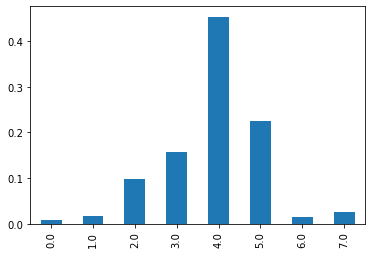

In [46]:
# Visualize distribution of education level
df.EdLevel.value_counts(normalize=True).sort_index().plot(kind='bar');

<a href='#contents'>(Table of Contents)</a>

<a id='clean_undergradmajor'></a>
## d) Wrangling *UndergradMajor* Data
Same here, different names for the same categories over the years that have to be cleaned up:

In [47]:
df[df.Year == 2020].UndergradMajor.value_counts()

Computer science, computer engineering, or software engineering                   31582
Another engineering discipline (such as civil, electrical, mechanical, etc.)       4754
Information systems, information technology, or system administration              4071
A natural science (such as biology, chemistry, physics, etc.)                      2205
Mathematics or statistics                                                          1849
Web development or web design                                                      1789
A business discipline (such as accounting, finance, marketing, etc.)               1375
A humanities discipline (such as literature, history, philosophy, etc.)            1007
A social science (such as anthropology, psychology, political science, etc.)        933
Fine arts or performing arts (such as graphic design, music, studio art, etc.)      725
I never declared a major                                                            453
A health science (such as nursin

In [48]:
df[df.Year == 2017].UndergradMajor.value_counts()

Computer science or software engineering                        21409
Computer engineering or electrical/electronics engineering       4364
Computer programming or Web development                          3883
Information technology, networking, or system administration     2140
A natural science                                                1865
A non-computer-focused engineering discipline                    1789
Mathematics or statistics                                        1648
Something else                                                   1060
A humanities discipline                                           901
A business discipline                                             900
Management information systems                                    654
Fine arts or performing arts                                      646
A social science                                                  633
I never declared a major                                          592
Psychology          

The problem with this column is that it's hard to match the categories from different years. *Computer engineering* for example is part of the category *Computer science, computer engineering, or software engineering* in 2020, while in 2017 it is part of *Computer engineering or electrical/electronics engineering*, together with *Electrical engineering*, which is part of *Another engineering discipline (such as civil, electrical, mechanical, etc.)* in 2020.

To handle this problem and in order to reduce the number of categories, I will merge certain categories into one. While some categories obviously belong together, in other cases, as described above, the choice is hard and could be disputed, but it is inevitable to make a choice here. I will also merge some related smaller categories together (like *Natural science* and *Health science*) just to reduce the number of categories and replace the category *Something else*, which only exists in the earlier years with NaN.

The complete list can be seen in the dict below:

In [49]:
# Define categories to merge
undergrad_dict = {
    "A humanities discipline (ex. literature, history, philosophy)" : "A humanities or arts discipline", 
    "A humanities discipline (such as literature, history, philosophy, etc.)" : "A humanities or arts discipline",
    "A humanities discipline" : "A humanities or arts discipline",
    "A social science (ex. anthropology, psychology, political science)" : "A social science",
    "A social science (such as anthropology, psychology, political science, etc.)" : "A social science",
    "Psychology" : "A social science",
    "A business discipline (ex. accounting, finance, marketing)" : "A business discipline",
    "A business discipline (such as accounting, finance, marketing, etc.)" : "A business discipline",
    "A natural science (ex. biology, chemistry, physics)" : "A natural or health science",
    "A natural science (such as biology, chemistry, physics, etc.)" : "A natural or health science",
    "A natural science" : "A natural or health science",
    "Fine arts or performing arts (ex. graphic design, music, studio art)" : "A humanities or arts discipline",
    "Fine arts or performing arts (such as graphic design, music, studio art, etc.)" : "A humanities or arts discipline",
    "Fine arts or performing arts" : "A humanities or arts discipline",
    "A health science (ex. nursing, pharmacy, radiology)" : "A natural or health science",
    "A health science (such as nursing, pharmacy, radiology, etc.)" : "A natural or health science",
    "A health science" : "A natural or health science",
    "Another engineering discipline (ex. civil, electrical, mechanical)" : "Another engineering discipline",
    "Another engineering discipline (such as civil, electrical, mechanical, etc.)" : "Another engineering discipline",
    "A non-computer-focused engineering discipline" : "Another engineering discipline",
    "Information systems, information technology, or system administration" : "Information technology, networking, or system administration",
    "Management information systems" : "Information technology, networking, or system administration",
    "Computer science or software engineering" : "Computer science, computer engineering, or software engineering",
    "Computer engineering or electrical/electronics engineering" : "Computer science, computer engineering, or software engineering",
    "Computer programming or Web development" : "Web development or web design",
    "Something else" : np.nan
}

# Merge categories
df.UndergradMajor = df.UndergradMajor.replace(undergrad_dict)

#List value counts for new categories
df.UndergradMajor.value_counts()

<a href='#contents'>(Table of Contents)</a>

<a id='clean_convertedcomp'></a>
## e) Wrangling *ConvertedComp* Data
The column contains numeric values, with a right skewed distribution and very many outliers and a lot of NaN values, which is typical for income data. There is no need to change the data, but it will be important to use a measurement that is robust to outliers when comparing these data, so I will use the median instead of the mean when it comes to analysing *ConvertedComp*.

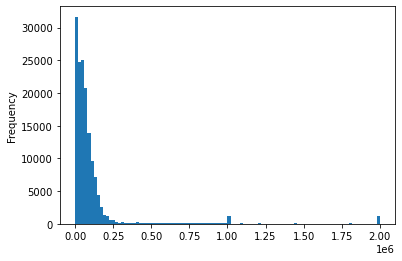

In [39]:
# Visualize distribution of 'ConvertedComp' column
df.ConvertedComp.plot(kind='hist', bins=100);

In addition, we need to have a closer look at the 2017 data in this column, as from the schema it was not absolutely clear if all of this income data was already converted into US dollar. However, the statistics below show that the standard deviation for 2017 is smaller than for the later years and that also the median as the most relevant meassure for this project doesn't differ extremly from the over years, so we can assume that this column those not contain mixed currencies and can be used in comparisons with the over years.

In [52]:
# Generate descriptive statistics overview of 'ConvertedComp' grouped by 'Year'
df.groupby(['Year']).ConvertedComp.describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2017,12891.0,56298.480641,39880.905277,0.0,26440.371839,50000.0,80000.0,197000.0
2018,47702.0,95780.861788,202348.215625,0.0,23844.000000,55075.0,93000.0,2000000.0
2019,55823.0,127110.738423,284152.303842,0.0,25777.500000,57287.0,100000.0,2000000.0
2020,34756.0,103756.050150,226885.296243,0.0,24648.000000,54049.0,95000.0,2000000.0


<a href='#contents'>(Table of Contents)</a>

<a id='clean_jobsat'></a>
## f) Wrangling *JobSat* Data
Having a closer look at *JobSat* shows that there was an eleven-part numeric scale ranging from 0 to 10 used in 2017, a seven-part categorical scale in 2018 and a five-part categorical scale in 2019 and 2020. In order to make the data comparable I will convert all data into a five-part numeric scale ranging from 1 for 'Very unsatisfied' to 5 for 'Very satisfied'.

In [53]:
# Get proportion of all values for 'JobSat' column grouped by year
df.groupby('Year').JobSat.value_counts(normalize=True)

Year  JobSat                            
2017  8.0                                   0.176962
      7.0                                   0.157371
      9.0                                   0.110536
      6.0                                   0.094289
      10.0                                  0.082846
      5.0                                   0.076085
      8.0                                   0.045522
      7.0                                   0.039999
      4.0                                   0.037076
      3.0                                   0.033312
      9.0                                   0.027492
      6.0                                   0.022761
      10.0                                  0.019888
      2.0                                   0.017733
      5.0                                   0.016767
      0.0                                   0.009511
      4.0                                   0.009114
      1.0                                   0.007504
     

In [54]:
# Define mapping of 11-part to new 5-part numeric scale
num_job_sat_dict = {0 : 1, 1 : 1,
                    2 : 2, 3 : 2, 4 : 2, 
                    5 : 3, 
                    6 : 4, 7 : 4, 8 : 4,
                    9 : 5, 10 : 5}

# Convert JobSat column for 2017 data into 5-part numeric scalee
df.loc[df.Year == 2017, 'JobSat'] = df[df.Year == 2017].JobSat.astype('float32').map(num_job_sat_dict)

In [55]:
# Define mapping of 5-part and 7-part categorical scales to new 5-part numeric scale
cat_job_sat_dict = {
    'Very dissatisfied' : 1,
    'Extremely dissatisfied' : 1,
    'Moderately dissatisfied' : 1,
    'Slightly dissatisfied' : 2,
    'Neither satisfied nor dissatisfied' : 3,
    'Slightly satisfied' : 4,
    'Moderately satisfied' : 5,
    'Very satisfied' : 5,
    'Extremely satisfied' : 5
}

# Convert JobSat column for 2018 - 2020 data into 5-part numeric scalee
df.loc[df.Year != 2017, 'JobSat'] = df[df.Year != 2017].JobSat.map(cat_job_sat_dict)

The conversion of different scales into one inevitably changes the data. I have tried to use a mapping that both makes sense and wherever possible leads to a correlating distribution of the categories. However, this is only possible to a certain degree, as the distribution below shows, so we will have to keep in mind to be careful when comparing job satisfaction over years, as there will be changes that have been caused by this conversion.

In [56]:
# Get distribution of JobSat converted to 5-part numeric scale grouped by year
df.groupby('Year').JobSat.value_counts(normalize=True).sort_index()

Year  JobSat
2017  1.0       0.020804
      2.0       0.108678
      3.0       0.092852
      4.0       0.536903
      5.0       0.240762
2018  1.0       0.127028
      2.0       0.101868
      3.0       0.071684
      4.0       0.144523
      5.0       0.554896
2019  1.0       0.068420
      2.0       0.151462
      3.0       0.122838
      4.0       0.341001
      5.0       0.316279
2020  1.0       0.082887
      2.0       0.157632
      3.0       0.127959
      4.0       0.308227
      5.0       0.323295
Name: JobSat, dtype: float64

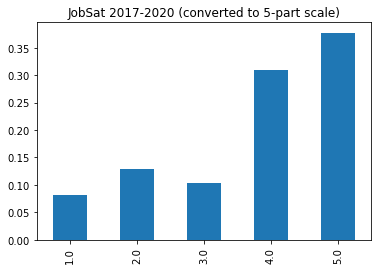

In [57]:
# Visualize distribution of JobSat converted to 5-part scale
df.JobSat.value_counts(normalize=True).sort_index().plot(kind='bar',
                                                         title='JobSat 2017-2020 (converted to 5-part scale)');

<a href='#contents'>(Table of Contents)</a>

<a id='clean_gender'></a>
## g) Wrangling *Gender* Data

In [58]:
df.groupby('Year').Gender.value_counts(normalize=True)

Year  Gender                                                                   
2017  Male                                                                         0.901332
      Female                                                                       0.074186
      Other                                                                        0.006420
      Male; Other                                                                  0.004879
      Gender non-conforming                                                        0.004565
      Male; Gender non-conforming                                                  0.001855
      Female; Transgender                                                          0.001598
      Transgender                                                                  0.001569
      Female; Gender non-conforming                                                0.000827
      Male; Female                                                                 0.000428


The schema explicitly states that multiple answers where possible for this question (and slightly different categories in 2017 and 2018), but for the purpose of this project I will keep it more simple and assume that there are only three gender categories and that every respondent who doesn't solely chose one of the categories *Woman* or *Man* falls into the category *Non-binary, genderqueer, or gender non-conforming* and for reasons of simplification rename the category into *Diverse*. 

In [59]:
# Set gender value to 'Diverse' for all values that are neither solely 'Man'/'Male' or 'Woman'/'Female' or NaN
diverse = ((df.Gender != 'Man') & (df.Gender != 'Male') & 
           (df.Gender != 'Woman') & (df.Gender != 'Female') & 
           (df.Gender.notna()))
df.loc[diverse, 'Gender'] = 'Diverse'

# Replace 'Male'/'Female' values in by 'Man'/'Woman'
df.Gender = df.Gender.replace({'Male' : 'Man', 'Female' : 'Woman'})

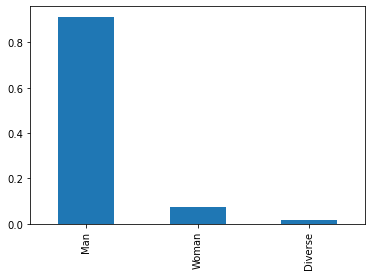

In [60]:
# Visualize cleaned 'Gender' distribution
df.Gender.value_counts(normalize=True).plot(kind='bar');

### Assessing the cleaned dataframe

In [61]:
df.describe()

,EdLevel,ConvertedComp,Year,DataScientist,FullStackDev,BackEndDev,FrontEndDev,AllRespondents
count,288807.000000,1.511720e+05,295553.000000,295553.000000,295553.000000,295553.000000,295553.000000,295553.0
mean,3.898579,1.058168e+05,2018.524346,0.071496,0.384703,0.410055,0.269891,1.0
std,1.156758,2.347656e+05,0.997824,0.257653,0.486526,0.491844,0.443904,0.0
min,0.000000,0.000000e+00,2017.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,3.000000,2.497200e+04,2018.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,4.000000,5.499600e+04,2018.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,5.000000,9.500000e+04,2019.000000,0.000000,1.000000,1.000000,1.000000,1.0
max,7.000000,2.000000e+06,2020.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [62]:
# Write cleaned dataframe to csv file
df.to_csv('df_clean.csv', index=False)

<a href='#contents'>(Table of Contents)</a>

<a id='data_analysis'></a>
# 4. Data Analysis and Visualization

In [41]:
# Read cleaned 2020 data from csv file
df = pd.read_csv('df_clean.csv')
df.head()

,DevType,EdLevel,UndergradMajor,ConvertedComp,JobSat,Gender,Year,DataScientist,FullStackDev,BackEndDev,FrontEndDev,AllRespondents
0,"Developer, desktop or enterprise applications;...",5.0,"Computer science, computer engineering, or sof...",NaN,4.0,Man,2020,0.0,1.0,0.0,0.0,1
1,"Developer, full-stack;Developer, mobile",4.0,"Computer science, computer engineering, or sof...",NaN,1.0,NaN,2020,0.0,1.0,0.0,0.0,1
2,NaN,5.0,"Computer science, computer engineering, or sof...",NaN,2.0,Man,2020,0.0,0.0,0.0,0.0,1
3,NaN,4.0,"Computer science, computer engineering, or sof...",NaN,NaN,Man,2020,0.0,0.0,0.0,0.0,1
4,"Designer;Developer, front-end;Developer, mobile",2.0,NaN,NaN,4.0,Man,2020,0.0,0.0,0.0,1.0,1


<a href='#contents'>(Table of Contents)</a>

<a id='proportion'></a>
## a) Proportion of Data Scientists  

### How large is the proportion of Data Scientists among all respondents?  

To get an overview let's first have a look at the distribution of all different developer types in the most recent Stack Overflow from 2020:

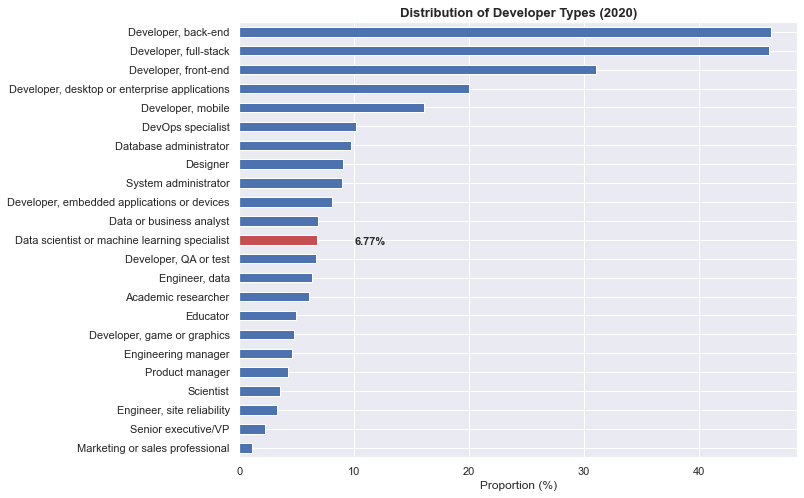

In [33]:
# Explode 'DevType' column to get proportion of all developer types for 2020
dev_dist_2020 = df[df.Year == 2020].DevType.str.split(';').explode().value_counts(
    normalize=True, dropna=False)*100

# Multiply by len/len(df)to take into account multiple rows for one respondent in exploded df
dev_dist_2020 *= len(df[df.Year == 2020].DevType.str.split(';').explode())/len(df[df.Year == 2020])

# Drop NaN category from series
dev_dist_2020.drop(np.nan, inplace=True)

# Set different color for Data Scientist bar
colors = [sns.color_palette()[3] if x == 'Data scientist or machine learning specialist' 
          else sns.color_palette()[0] for x in dev_dist_2020.index]

# Get percentage for data scientists for annotation
data_scientist_percentage = dev_dist_2020['Data scientist or machine learning specialist']

# Visualize Proportion of Developer Types in 2020
plt.figure(figsize=(10,8))
ax = dev_dist_2020.plot(kind='barh', color=colors)
ax.invert_yaxis()
ax.annotate(f'{data_scientist_percentage:.2f}%', 
            (10,11.25), 
            fontweight='bold', 
            fontsize=11)
ax.set_title('Distribution of Developer Types (2020)', fontsize=13, weight='bold')
ax.set_xlabel('Proportion (%)');

With 6.77% of all respondents describing themselves as 'Data scientist or machine learning specialist' (refered to as data scientists in the further analysis), the proportion of data scientists is much smaller than that of the most popular developer types like back-end and full-stack developers with about 56% each. But data scientists are still a relevant part of the Stack Overflow community and represent a big enough proportion to make reasonable comparisons.

Due to multiple answers the proportions of all developer types add up to more than 100 percent.

### Has this proportion changed significantly from 2017 to 2020?

As data scientist is a rather new profession, that has become quite popular during recent years, it would be interesting to investigate if also the proportion of data scientists has increased between 2017 and 2020:

In [101]:
# Get proportion of selected developer types grouped by year
dev_types = ['AllRespondents', 'DataScientist', 'FullStackDev', 'BackEndDev', 'FrontEndDev']
df.groupby('Year')[dev_types].mean()*100

,AllRespondents,DataScientist,FullStackDev,BackEndDev,FrontEndDev
Year,,,,,
2017,100,6.995252,0.000000,0.000000,0.000000
2018,100,7.331251,45.875137,55.129186,36.017046
2019,100,7.291690,47.657855,45.900400,30.079915
2020,100,6.772523,46.064363,46.239280,31.070731


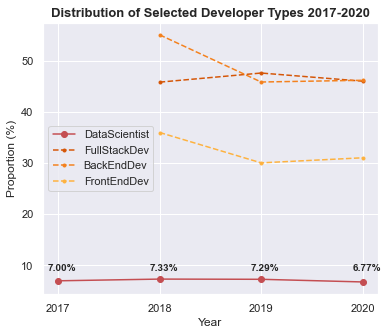

In [102]:
# Define ploting parameters for selected developer types
linestyle = ['-', '-', '--', '--', '--']
cols = [sns.color_palette()[0], sns.color_palette()[3], sns.color_palette('YlOrBr')[4],
        sns.color_palette('YlOrBr')[3], sns.color_palette('YlOrBr')[2]]
marks = ['o', 'o', '.', '.', '.']

# Visualize distribution of selected developer types 2017-2020
plt.figure(figsize=(6,5))
ds_vals = df.groupby('Year').DataScientist.mean()*100
ax = ds_vals.plot(marker='o', c=cols[1])
for i in range(2,5):
    ax = (df[df.Year > 2017].groupby('Year')[dev_types[i]].mean()*100
         ).plot(marker=marks[i], ls=linestyle[i], c=cols[i])
ax.set_title('Distribution of Selected Developer Types 2017-2020', fontsize=13, weight='bold')
ax.set_ylabel('Proportion (%)')
ax.legend(loc=6)
for year in range(2017, 2021):
    ax.annotate(f'{ds_vals[year]:.2f}%', (year-0.1, 9), fontweight='bold')
ax.set_xticks(range(2017, 2021));

As the data shows, this is not the case: In fact, the lowest rate of data scientists was recorded in 2020. But with a proportion of data scientists oscillating between 6.77 % and 7.33 % percent there is no significant trend regognizable.

<a href='#contents'>(Table of Contents)</a>

<a id='gender'></a>

## b) Gender

### Does the gender distribution differ between Data Scientists and other developer types?  

Let's first take a look at the gender distribution for different developer types in 2020:

In [6]:
selected_dev_types = ['AllRespondents', 'DataScientist', 'FullStackDev', 'BackEndDev', 'FrontEndDev']

# Get proportions of gender distribution for selected developer types in 2020
gender_2020 = (df[df.Year == 2020].groupby('Gender')[selected_dev_types].sum()/df[
    (df.Year == 2020) & (df.Gender.notna())][selected_dev_types].sum() * 100).round(2)
gender_2020 = gender_2020.reindex(['Man', 'Diverse', 'Woman'])
gender_2020

,AllRespondents,DataScientist,FullStackDev,BackEndDev,FrontEndDev
Gender,,,,,
Man,91.01,89.33,92.60,93.19,91.22
Diverse,1.38,1.72,1.24,1.27,1.33
Woman,7.60,8.94,6.17,5.55,7.45


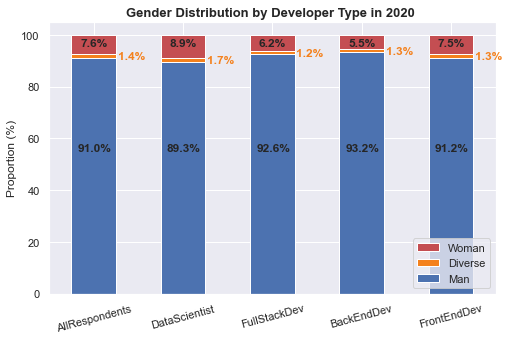

In [7]:
# Visualize gender distribution by developer type in 2020 
g_cols = [cols[0], cols[3], cols[1]]
ax = gender_2020.transpose().plot(kind='bar', stacked=True, figsize=(8,5), color=g_cols)
ax.set_title('Gender Distribution by Developer Type in 2020 ', fontsize=13, weight='bold')
ax.set_ylabel('Proportion (%)')
# Add percentage as annotation
for index, devtype in enumerate(selected_dev_types):
    ax.annotate(f'{gender_2020[devtype]["Man"]:.1f}%', 
                (index - 0.18 ,55), fontweight='bold', fontsize=12)
    ax.annotate(f'{gender_2020[devtype]["Diverse"]:.1f}%',
                (index + 0.27 ,98 - gender_2020[devtype]["Woman"]), 
                fontweight='bold', c=g_cols[1], fontsize=12)
    ax.annotate(f'{gender_2020[devtype]["Woman"]:.1f}%', 
                (index - 0.15 ,95.5), fontweight='bold', fontsize=12)
ax.tick_params('x', rotation=15)
# Reverse label order
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=reversed(handles), labels=reversed(labels), loc=4);

The visualization shows clearly that with 91% of all respondents being men, the Stack Overflow community is an extremly male dominated domain. With a male proportion of 89.3%, this also applies to data scientists, although this professional field is at least a bit more diverse, as the proportion of both women and diverse gender is slightly above the total average.

As diversity and gender mainstreaming have become a more important topic for many companies during the recent years, it would be interesting to investigate if there is a trend towards more diversity discernible between 2017 and 2020:

In [8]:
# Get gender distribution for all respondents grouped by year
gender_year = (pd.DataFrame(df.groupby('Year').Gender.value_counts(normalize=True)
                           ).unstack()*100).round(2).droplevel(0, axis=1)
gender_year

Gender,Diverse,Man,Woman
Year,,,
2017,2.45,90.13,7.42
2018,1.53,92.23,6.24
2019,1.34,91.23,7.43
2020,1.38,91.01,7.60


In [9]:
# Get gender distribution for data scientists grouped by year
gender_year_ds = (pd.DataFrame(df[df.DataScientist == 1].groupby('Year').Gender.value_counts(normalize=True)
                           ).unstack()*100).round(2).droplevel(0, axis=1)
gender_year_ds

Gender,Diverse,Man,Woman
Year,,,
2017,2.80,91.28,5.92
2018,1.91,91.10,6.98
2019,1.79,90.44,7.77
2020,1.72,89.33,8.94


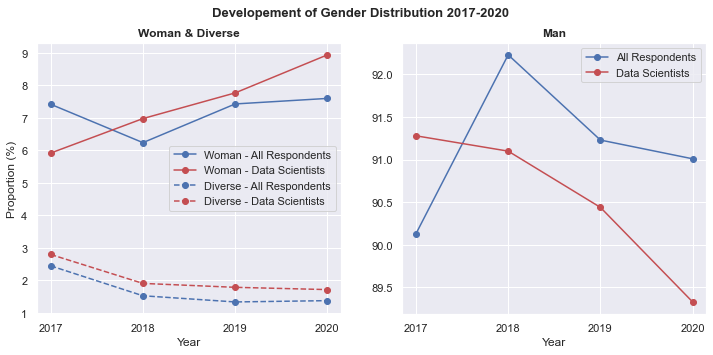

In [10]:
# Visualize distribution of gender grouped by year
fig, ax = plt.subplots(1, 2, figsize=(12,5))
fig.suptitle('Developement of Gender Distribution 2017-2020', fontsize='13', weight='bold')

# Subplot for Woman and Diverse
plt.subplot(1, 2, 1)
ax = gender_year.Woman.plot(color='b', marker='o', label='Woman - All Respondents')
ax = gender_year_ds.Woman.plot(color='r', marker='o', label='Woman - Data Scientists')
ax = gender_year.Diverse.plot(color='b', marker='o', linestyle='--', 
                              label='Diverse - All Respondents')
ax = gender_year_ds.Diverse.plot(color='r', marker='o', linestyle='--', 
                                 label='Diverse - Data Scientists')
ax.set_xticks(range(2017, 2021))
ax.set_ylabel('Proportion (%)')
ax.set_title('Woman & Diverse', fontsize='12', weight='bold')
ax.legend();

# Subplot for Man
plt.subplot(1, 2, 2)
ax = gender_year.Man.plot(color='b', marker='o', label='All Respondents')
ax = gender_year_ds.Man.plot(color='r', marker='o', label='Data Scientists')
ax.set_xticks(range(2017, 2021))
ax.set_title('Man', fontsize='12', weight='bold')
ax.legend();

Although the data basis is a bit thin to draw definite conclusions, it looks like there is a slight but steady trend towards more gender equality in the field of data science, with the proportion of men slightly decreasing each year from 91.3% in 2017 to 89.3% in 2020.

Within all respondent there is no clear trend towards more diversity visible. In fact, the male proportion for all respondents is slightly higher in 2020 than it was in 2017.

<a href='#contents'>(Table of Contents)</a>

<a id='education'></a>

## c) Education

### Do Data Scientists have a different education level than other developer?  

Let's first have a look at the mean education level of selected developer types:

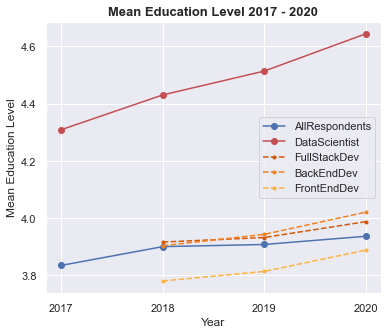

In [34]:
# Visualize mean education level for selected developer types grouped by year
plt.figure(figsize=(6,5))
for i in range(5):
    ax = df[df[dev_types[i]] == 1].groupby('Year').EdLevel.mean(
    ).plot(label=dev_types[i], marker=marks[i], ls=linestyle[i], c=cols[i])
ax.legend()
ax.set_xticks(range(2017, 2021))
ax.set_ylabel('Mean Education Level')
ax.set_title('Mean Education Level 2017 - 2020', fontsize='13', weight='bold');

The visualization shows that the mean education level of data scientists is significantly higher than that of both all respondents and the three other developer types uses as reference groups.

There is a trend towards higher education for all groups, but this trend is more distinct for data scientists.

Let's have a look at the distribution of the distinct education levels for data scientists and all respondents:

In [43]:
# Visualize difference between education level distribution of data scientists and all respondents in 2020
ed_lev_comp = (df[df.Year == 2020].groupby('EdLevel')[['AllRespondents', 'DataScientist']].sum()/df[
    (df.Year == 2020) & (df.EdLevel.notna())][['AllRespondents', 'DataScientist']].sum() * 100).round(2)
ed_lev_comp.index = ["I never completed any formal education", 
                    "Primary/elementary school", 
                    "Secondary school", 
                    "Some college/university study without earning a bachelor's degree",
                    "Bachelor's degree", 
                    "Master's degree", 
                    "Professional degree", 
                    "Doctoral degree"]
ed_lev_comp.insert(2, 'Difference', ed_lev_comp.DataScientist - ed_lev_comp.AllRespondents)
ed_lev_comp.style.bar(subset=['Difference'], align='mid', color=['#d65f5f', '#5fba7d']).format('{:.4} %')

,AllRespondents,DataScientist,Difference
I never completed any formal education,0.86 %,1.02 %,0.16 %
Primary/elementary school,1.64 %,0.59 %,-1.05 %
Secondary school,8.31 %,2.19 %,-6.12 %
Some college/university study without earning a bachelor's degree,15.81 %,7.38 %,-8.43 %
Bachelor's degree,46.22 %,35.16 %,-11.06 %
Master's degree,22.83 %,38.93 %,16.1 %
Professional degree,1.39 %,1.2 %,-0.19 %
Doctoral degree,2.94 %,13.54 %,10.6 %


The higher mean education level is caused by a significantly higher proportion of data scientists with a masters's degree (+16.1%) or a doctoral degree (+10.6%) compared to all respondents.

### How does their primary field of study differ?
Let's have a look at the distribuition of primary study fields for our selected developer types:

In [63]:
# Get proportions of primary study fields for 2020 by developer type
primary_fields = (df[df.Year == 2020].groupby('UndergradMajor')[selected_dev_types].sum()/df[
    (df.Year == 2020) & (df.UndergradMajor.notna())][selected_dev_types].sum() * 100).round(2)
primary_fields.sort_values(by=['AllRespondents'], ascending=False, inplace=True)
primary_fields

,AllRespondents,DataScientist,FullStackDev,BackEndDev,FrontEndDev
UndergradMajor,,,,,
"Computer science, computer engineering, or software engineering",61.93,50.27,65.71,66.89,61.97
Another engineering discipline,9.32,12.19,7.52,7.68,7.45
"Information technology, networking, or system administration",7.98,5.14,8.23,8.34,8.90
A natural or health science,4.82,11.01,3.49,3.73,3.25
Mathematics or statistics,3.63,11.92,2.56,3.05,2.25
Web development or web design,3.51,0.81,4.02,3.52,5.92
A humanities or arts discipline,3.40,1.94,3.48,2.73,4.64
A business discipline,2.70,2.93,2.54,1.98,2.80
A social science,1.83,3.47,1.59,1.28,1.81


It's striking that while the distribution of undergraduate majors of full-stack, back-end and front-end developers is pretty similar to the distribution within all respondents, there are quite a few differences observable for data scientists.

Let's have a closer lok at these differences:

In [64]:
# Visualize difference between Data Scientists and all respondents
primary_fields.insert(2, 'Difference', 
                      primary_fields.DataScientist - primary_fields.AllRespondents)
primary_fields.iloc[:,:3].style.bar(
    subset=['Difference'], align='mid', color=['#d65f5f', '#5fba7d']).format('{:.4} %')

,AllRespondents,DataScientist,Difference
UndergradMajor,,,
"Computer science, computer engineering, or software engineering",61.93 %,50.27 %,-11.66 %
Another engineering discipline,9.32 %,12.19 %,2.87 %
"Information technology, networking, or system administration",7.98 %,5.14 %,-2.84 %
A natural or health science,4.82 %,11.01 %,6.19 %
Mathematics or statistics,3.63 %,11.92 %,8.29 %
Web development or web design,3.51 %,0.81 %,-2.7 %
A humanities or arts discipline,3.4 %,1.94 %,-1.46 %
A business discipline,2.7 %,2.93 %,0.23 %
A social science,1.83 %,3.47 %,1.64 %


In [65]:
female_2020 = df[(df.Year == 2020) & (df.Gender == 'Woman')]
fem_ds = (female_2020.groupby('UndergradMajor').DataScientist.sum()
          /(female_2020[female_2020.UndergradMajor.notna()].DataScientist.sum())* 100).round(2)
primary_fields.insert(1, 'FemaleDataScientists', fem_ds)
primary_fields.insert(2, 'FemDifference', 
                      primary_fields.FemaleDataScientists - primary_fields.AllRespondents)
primary_fields.iloc[:,:3].style.bar(
    subset=['FemDifference'], align='mid', color=['#d65f5f', '#5fba7d']).format('{:.4} %')

,AllRespondents,FemaleDataScientists,FemDifference
UndergradMajor,,,
"Computer science, computer engineering, or software engineering",61.93 %,40.56 %,-21.37 %
Another engineering discipline,9.32 %,9.44 %,0.12 %
"Information technology, networking, or system administration",7.98 %,5.94 %,-2.04 %
A natural or health science,4.82 %,19.23 %,14.41 %
Mathematics or statistics,3.63 %,13.29 %,9.66 %
Web development or web design,3.51 %,0.7 %,-2.81 %
A humanities or arts discipline,3.4 %,2.45 %,-0.95 %
A business discipline,2.7 %,2.1 %,-0.6 %
A social science,1.83 %,6.29 %,4.46 %


In [125]:
# Get study fields with greatest differences in distribution
primary_difs = primary_fields[(abs(primary_fields.Difference) > 3) | 
                              (abs(primary_fields.FemDifference) > 3)].iloc[:,[4,2]]
primary_difs = primary_difs.rename(index={'Computer science, computer engineering, or software engineering' :
                                         'CS or software engineering'})

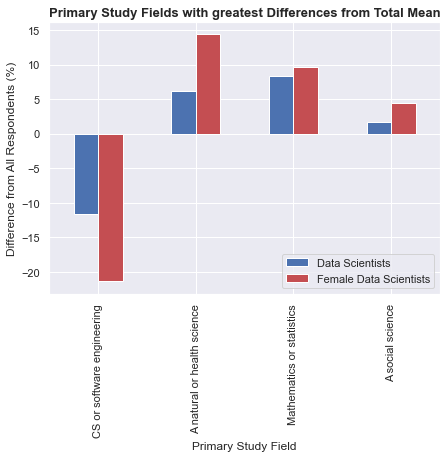

In [126]:
ax = primary_difs.plot(kind='bar', figsize=(7,5), color=cols)
ax.set_ylabel('Difference from All Respondents (%)')
ax.set_xlabel('Primary Study Field')
ax.set_title('Primary Study Fields with greatest Differences from Total Mean', fontsize='13', weight='bold')
ax.legend(loc=4, labels=['Data Scientists', 'Female Data Scientists']);

In [83]:
primary_difs2 = primary_fields[(abs(primary_fields.Difference) > 3) | 
                              (abs(primary_fields.FemDifference) > 3)
                             ][['AllRespondents', 'Difference', 'FemDifference']]
primary_difs2

,AllRespondents,Difference,FemDifference
UndergradMajor,,,
"Computer science, computer engineering, or software engineering",61.93,-11.66,-21.37
A natural or health science,4.82,6.19,14.41
Mathematics or statistics,3.63,8.29,9.66
A social science,1.83,1.64,4.46


<a href='#contents'>(Table of Contents)</a>

<a id='income'></a>

## d) Income

### How does the income differ between Data Scientists and other developer types?

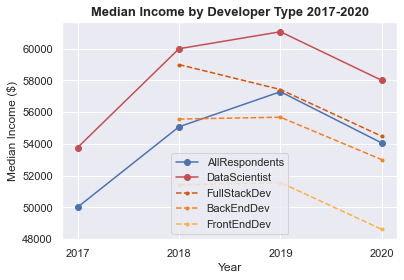

In [17]:
# Visualize Median Income by Developer Type 2017 - 2020
for i in range(5):
    ax = df[df[dev_types[i]] == 1].groupby('Year').ConvertedComp.median().plot(
        label=dev_types[i], marker=marks[i], ls=linestyle[i], c=cols[i])
ax.legend()
ax.set_xticks(range(2017, 2021))
ax.set_ylabel('Median Income ($)')
ax.set_title('Median Income by Developer Type 2017-2020', fontsize='13', weight='bold');

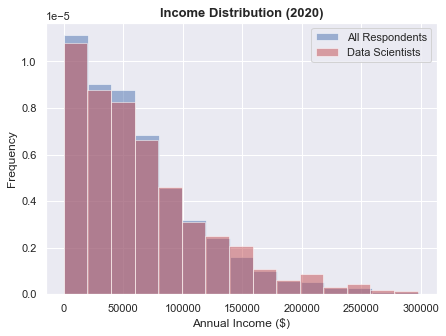

In [61]:
# Visualize income distribution for data scientists vs. all respondents in 2020
plt.figure(figsize=(7,5))
ax = df[(df.Year == 2020) & (df.ConvertedComp < 3e5)
       ].ConvertedComp.plot(kind='hist',bins=15, density=True, alpha=0.5, 
                            label='All Respondents')
ax = df[(df.Year == 2020) & (df.DataScientist == 1) & (df.ConvertedComp < 3e5)
       ].ConvertedComp.plot(kind='hist', bins=15, density=True, alpha=0.5, 
                            label='Data Scientists', color='r')
ax.legend()
ax.set_xlabel('Annual Income ($)')
ax.set_title('Income Distribution (2020)', fontsize='13', weight='bold');

<a href='#contents'>(Table of Contents)</a>

<a id='jobsat'></a>

## e) Job Satisfaction


### Does job satisfaction differ between Data Scientists and other developer types?

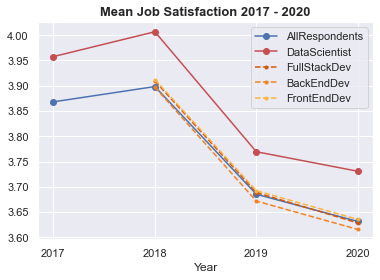

In [19]:
# Visualize mean job satisfaction by developer type 2017-2020
for i in range(5):
    ax = df[df[dev_types[i]] == 1].groupby('Year').JobSat.mean(
    ).plot(label=dev_types[i], marker=marks[i], ls=linestyle[i], c=cols[i])
ax.legend()
ax.set_xticks(range(2017, 2021))
ax.set_title('Mean Job Satisfaction 2017 - 2020', fontsize='13', weight='bold');

In [28]:
job_sats = (df[df.Year == 2020].groupby('JobSat')[selected_dev_types].sum()/df[
    (df.Year == 2020) & (df.JobSat.notna())][selected_dev_types].sum() * 100).round(2)
job_sats.index = ['Very dissatisfied', 'Slightly dissatisfied', 
                  'Neither satisfied nor dissatisfied', 'Slightly satisfied ','Very satisfied']
job_sats

,AllRespondents,DataScientist,FullStackDev,BackEndDev,FrontEndDev
Very dissatisfied,8.29,8.30,8.20,8.31,8.34
Slightly dissatisfied,15.76,13.95,15.93,16.13,15.68
Neither satisfied nor dissatisfied,12.80,10.99,12.80,13.02,12.65
Slightly satisfied,30.82,29.91,30.97,30.79,30.76
Very satisfied,32.33,36.85,32.10,31.76,32.57


In [29]:
# Visualize difference between Data Scientists and all respondents
job_sats.insert(2, 'Difference', job_sats.DataScientist - job_sats.AllRespondents)
job_sats.iloc[:,:3].style.bar(subset=['Difference'], align='mid', color=['#d65f5f', '#5fba7d']).format('{:.4} %')

,AllRespondents,DataScientist,Difference
Very dissatisfied,8.29 %,8.3 %,0.01 %
Slightly dissatisfied,15.76 %,13.95 %,-1.81 %
Neither satisfied nor dissatisfied,12.8 %,10.99 %,-1.81 %
Slightly satisfied,30.82 %,29.91 %,-0.91 %
Very satisfied,32.33 %,36.85 %,4.52 %
